Mean Squared Error: 0.05855902354416063


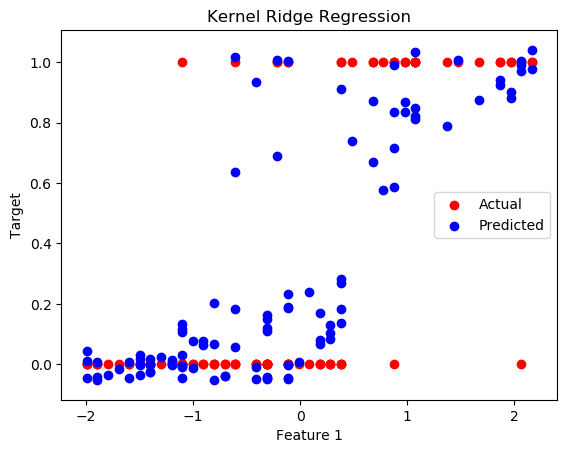

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset for regression
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values

# Handle the categorical 'Gender' column using one-hot encoding
gender_column = dataset['Gender']
gender_onehot = pd.get_dummies(gender_column, drop_first=True)  # One-hot encode the 'Gender' column
X = np.concatenate((X, gender_onehot), axis=1)

y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.kernel_ridge import KernelRidge
regressor = KernelRidge(kernel='rbf', alpha=0.1)  # You can adjust the hyperparameter alpha for regularization
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the regression results
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='blue', label='Predicted')
plt.title('Kernel Ridge Regression')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.legend()
plt.show()
